# FreeCodeCamp Challenge 05: Sea Level Predictor.
In this project we anaylize a dataset of the global average sea level change since 1880, and use it to predict the sea level change until 2050. <br>
**Data Source:** Global Average Absolute Sea Level Change, 1880-2014 from the US Environmental Protection Agency using data from CSIRO, 2015; NOAA, 2015. Available at: https://datahub.io/core/sea-level-rise

In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

### Importing data

In [2]:
sea_level = pd.read_csv("epa-sea-level.csv", float_precision="legacy")
sea_level.head(5)

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


In [3]:
# Checking dimensions of the dataset
sea_level.shape

(134, 5)

In [4]:
# Displaying information about the data
sea_level.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      134 non-null    int64  
 1   CSIRO Adjusted Sea Level  134 non-null    float64
 2   Lower Error Bound         134 non-null    float64
 3   Upper Error Bound         134 non-null    float64
 4   NOAA Adjusted Sea Level   21 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 5.4 KB


### Drawing a scatter plot with predicting linear regressions

In [5]:
# Defining values
x = sea_level["Year"]
y = sea_level["CSIRO Adjusted Sea Level"]

In [6]:
# Creating a first line of best fit using all data
# Performing linear regression
first_line = linregress(x, y)

# Checking slope and R^2 of the regression
print(f"Linear regression of dataset 1880-2013.\nSlope: {first_line.slope:0.2f}, y-Intercept: {first_line.intercept:0.2f}, R-squared: {first_line.rvalue**2:0.2f}.")

Linear regression of dataset 1880-2013.
Slope: 0.06, y-Intercept: -119.07, R-squared: 0.97.


In [7]:
# Creating a second line of regression with data from 2000-2013
# Setting the new dataset
new_dataset = sea_level[sea_level["Year"] >= 2000]
new_dataset.head(5)

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
120,2000,7.062992,6.791339,7.334646,6.920582
121,2001,7.287402,7.019685,7.555118,7.087460
122,2002,7.381890,7.110236,7.653543,7.319698
123,2003,7.759843,7.484252,8.035433,7.488353
124,2004,7.740157,7.464567,8.015748,7.507933


In [8]:
# Performing second linear regression
x_new = new_dataset["Year"]
y_new = new_dataset["CSIRO Adjusted Sea Level"]
second_line = linregress(x_new, y_new)

# Checking slope and R^2 of the new regression
print(f"Linear regression of dataset 2000-2013.\nSlope: {second_line.slope:0.2f}, y-Intercept: {second_line.intercept:0.2f}, R-squared: {second_line.rvalue**2:0.2f}.")

Linear regression of dataset 2000-2013.
Slope: 0.17, y-Intercept: -325.79, R-squared: 0.95.


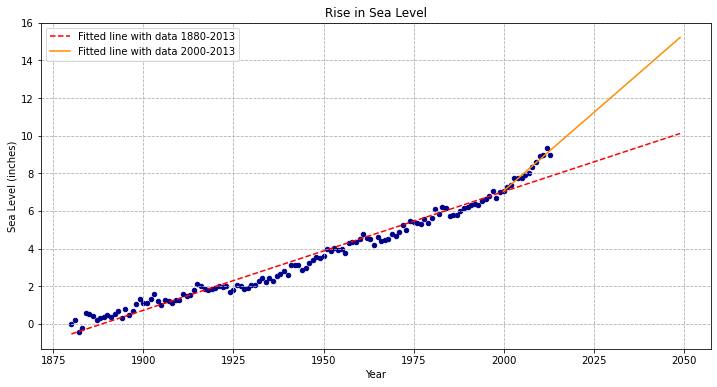

In [9]:
# Plotting graph
fig, ax = plt.subplots(figsize=(12,6))

# Scatter plot
ax = plt.scatter(x, y, s=20, c="darkblue")

# Plotting the first line fit
x_fit_one = np.arange(1880, 2050)
y_fit_one = (first_line.intercept) + (first_line.slope * x_fit_one)
ax = plt.plot(x_fit_one, y_fit_one, "r--", label="Fitted line with data 1880-2013")

# Plotting the second line fit
x_fit_two = np.arange(2000, 2050)
y_fit_two = (second_line.intercept) + (second_line.slope * x_fit_two)
ax = plt.plot(x_fit_two, y_fit_two, label="Fitted line with data 2000-2013", c="darkorange")


# Styling the plot
ax = plt.title("Rise in Sea Level")
ax = plt.xlabel("Year")
ax = plt.ylabel("Sea Level (inches)")
ax = plt.legend()
ax = plt.grid(linestyle="--")

# Showing plot
plt.show()

In [10]:
# Saving the figure
fig.savefig("sea_level_plot.png")